In [1]:
import os 

In [2]:
data_dir = '/Users/fasihussaini/Desktop/cell_images'

In [11]:
os.listdir(data_dir)[0]


'.DS_Store'

In [24]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.image import imread


In [26]:
test_path = data_dir+'/test'
train_path = data_dir+'/train'

In [29]:
os.listdir(train_path)

['.DS_Store', 'parasitized', 'uninfected']

In [39]:
para_cell = train_path+'/parasitized/'+'C189P150ThinF_IMG_20151203_142224_cell_84.png'

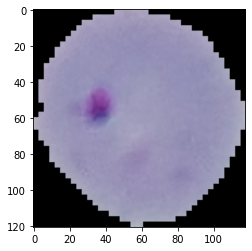

In [43]:
plt.imshow(imread(para_cell))

In [47]:
os.listdir(train_path+'/uninfected')[0]

'C13NThinF_IMG_20150614_131318_cell_179.png'

In [48]:
uninf_cell = train_path+'/uninfected/'+'/C13NThinF_IMG_20150614_131318_cell_179.png'

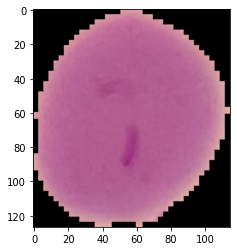

In [49]:
plt.imshow(imread(uninf_cell))

In [50]:
pwd

'/Users/fasihussaini/Downloads/TF_2_Notebooks_and_Data/04-CNNs'

In [53]:
len(os.listdir(train_path+'/parasitized'))

12480

In [54]:
len(os.listdir(train_path+'/uninfected'))

12480

In [55]:
len(os.listdir(test_path+'/uninfected'))

1300

In [56]:
len(os.listdir(test_path+'/parasitized'))

1300

In [72]:
dim1 =[]
dim2 =[]

for img_filename in os.listdir(test_path+'/uninfected'):
    
    img= imread(test_path+"/uninfected/"+img_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
        


In [76]:
np.mean(dim1)

130.92538461538462

In [77]:
np.mean(dim2)

130.75

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


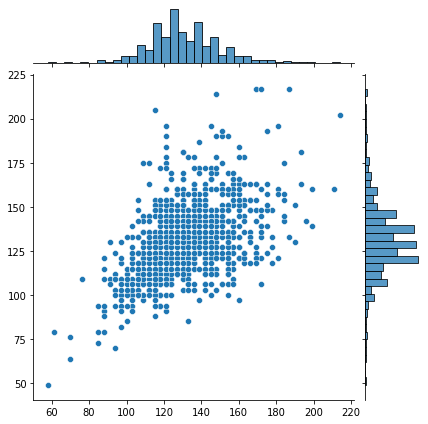

In [78]:
sns.jointplot(dim1,dim2)

In [79]:
image_shape = (130,130,3)

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [81]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Args:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_s

In [85]:
para_cell

'/Users/fasihussaini/Desktop/cell_images/train/parasitized/C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [88]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [96]:
para_cell=imread(para_cell)

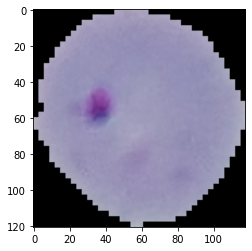

In [98]:
plt.imshow(para_cell)

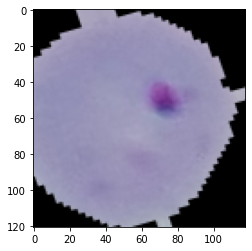

In [108]:
plt.imshow(image_gen.random_transform(para_cell))

In [111]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [113]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Dropout,Flatten

In [115]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D())


model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D())


model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2022-03-07 04:45:43.489061: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [117]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [119]:
from tensorflow.keras.callbacks import EarlyStopping 

In [120]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [122]:
batch_size=16

In [123]:
train_path

'/Users/fasihussaini/Desktop/cell_images/train'

In [124]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                               )

Found 24958 images belonging to 2 classes.


In [125]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                               shuffle=False
                                               )

Found 2600 images belonging to 2 classes.


In [126]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [127]:
results = model.fit_generator(train_image_gen,epochs=20, 
                              validation_data=test_image_gen,
                              callbacks=[early_stop])

Epoch 1/20


/var/folders/ys/r1f3d1bn3k11yrhwbf5xl1hh0000gn/T/ipykernel_27789/1509124778.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=20,


1560/1560 [==============================] - 274s 175ms/step - loss: 0.7921 - accuracy: 0.5484 - val_loss: 0.6808 - val_accuracy: 0.5673
Epoch 2/20
1560/1560 [==============================] - 285s 183ms/step - loss: 0.6751 - accuracy: 0.5849 - val_loss: 0.6662 - val_accuracy: 0.6031
Epoch 3/20
1560/1560 [==============================] - 307s 197ms/step - loss: 0.6311 - accuracy: 0.6357 - val_loss: 0.2916 - val_accuracy: 0.9046
Epoch 4/20
1560/1560 [==============================] - 360s 231ms/step - loss: 0.2553 - accuracy: 0.9201 - val_loss: 0.2480 - val_accuracy: 0.9258
Epoch 5/20
1560/1560 [==============================] - 319s 204ms/step - loss: 0.2255 - accuracy: 0.9284 - val_loss: 0.2185 - val_accuracy: 0.9323
Epoch 6/20
1560/1560 [==============================] - 368s 236ms/step - loss: 0.2165 - accuracy: 0.9314 - val_loss: 0.2123 - val_accuracy: 0.9292
Epoch 7/20
1560/1560 [==============================] - 345s 221ms/step - loss: 0.2073 - accuracy: 0.9355 - val_loss: 0.207

In [147]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

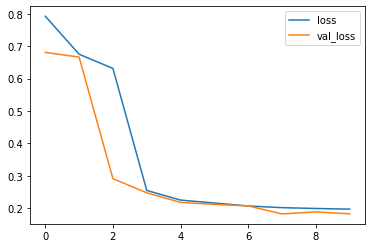

In [152]:
losses[['loss','val_loss']].plot()


<AxesSubplot:>

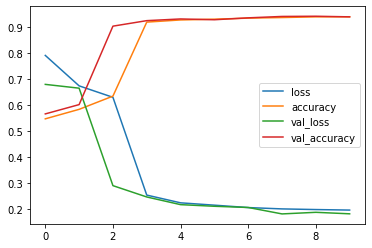

In [153]:
losses.plot()

In [165]:
model.evaluate_generator(test_image_gen)

/var/folders/ys/r1f3d1bn3k11yrhwbf5xl1hh0000gn/T/ipykernel_27789/4011314882.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[0.1876104325056076, 0.9403846263885498]

In [166]:
model.metrics_names

['loss', 'accuracy']

In [167]:
pred = model.predict_generator(test_image_gen)

/var/folders/ys/r1f3d1bn3k11yrhwbf5xl1hh0000gn/T/ipykernel_27789/2032896581.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_image_gen)


In [204]:
predictions = pred > 0.5

In [205]:
len(predictions)


2600

In [206]:
from sklearn.metrics import classification_report,confusion_matrix 

In [207]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [208]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1300
           1       0.93      0.96      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [209]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1200,  100],
       [  50, 1250]])

In [218]:
os.listdir(test_path+'/parasitized')[9]

'C175P136NThinF_IMG_20151127_142009_cell_241.png'

In [227]:
para_cell= test_path +'/parasitized/'+  os.listdir(test_path+'/parasitized')[9]

In [228]:
para_cell

'/Users/fasihussaini/Desktop/cell_images/test/parasitized/C175P136NThinF_IMG_20151127_142009_cell_241.png'

In [229]:
from tensorflow.keras.preprocessing import image

In [230]:
my_image = image.load_img(para_cell,target_size=image_shape)

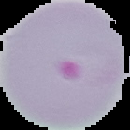

In [231]:
my_image

In [233]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

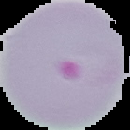

In [235]:
my_image

In [236]:
my_image = image.img_to_array(my_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


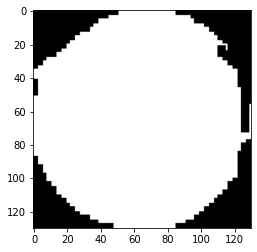

In [238]:
plt.imshow(my_image)

In [240]:
my_image.shape

(130, 130, 3)

In [242]:
my_image = np.expand_dims(my_image,axis=0)

In [244]:
my_image.shape # because model needs batch size as well 

(1, 130, 130, 3)

In [245]:
model.predict(my_image)

array([[0.34595042]], dtype=float32)